## FNCE 2431 Group 1 HW Module 6 (DSA)  
7/23/2022

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os

In [2]:
%%capture
!pip install ipypublish
from ipypublish import nb_setup

In [3]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


In [8]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
drive.mount('/content/drive')
os.chdir("drive/My Drive/FNCE2431Group_1/Course_Content_Notebooks_Plus")

Mounted at /content/drive
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%%capture
df = pd.read_csv("../loan.csv")

# use if local file and comment out Google drive stuff
#df = pd.read_csv("loan.csv")

In [11]:
# Run to see 73 features and non-null counts
#df.info()

In [12]:
#Removed 23 features/cols not relevant at loan time or are just labels
#Drop unneccesary features
df.drop(["id", "member_id", "emp_title","funded_amnt", "funded_amnt_inv","policy_code", 
         "url", "desc","application_type", "annual_inc_joint", "dti_joint",
         "verification_status_joint", "issue_d", "pymnt_plan", 
         "title","zip_code","earliest_cr_line","initial_list_status",
         "out_prncp_inv","total_pymnt_inv","last_pymnt_d",
         "next_pymnt_d","last_credit_pull_d"], axis=1, inplace = True)

In [13]:
# View all the columns
pd.set_option("display.max_columns", None)

In [14]:
# Determine from loan status what will be 1:Good, or 0:Bad loan
df["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [15]:
# All current and fully paid as conservative Good - demonstrating aability to repay
# Set the 'Target_load_status' and the binary dependent variable
df["Target_loan_status"] = df["loan_status"].replace({
    "Current":1,
    "Fully Paid":1,
    "Charged Off": 0, 
    'Late (31-120 days)': 0,
    'Issued': 0,
    'In Grace Period': 0,
    'Late (16-30 days)': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Default': 0,
    'Does not meet the credit policy. Status:Charged Off': 0
})

In [16]:
df.drop(columns = "loan_status", inplace=True)

In [ ]:
#  Look at balance of data
df["Target_loan_status"].value_counts()

In [18]:
df.shape

(887379, 51)

In [19]:
# Look at the counts of null values in features
#df.isnull().sum()

In [20]:
# Drop all NaN
df.dropna(axis="columns", inplace = True)

In [21]:
# Transform the categoricals
df2 = pd.get_dummies(df, ["term", "grade", "sub_grade", "home_ownership", 
                          "verification_status", "purpose","addr_state"])

In [22]:
df2.shape

(887379, 132)

In [23]:
# Bring the target to the first column
first_col = df2.pop('Target_loan_status')
df2.insert(0, 'Target_loan_status', first_col)

In [24]:
# Features - uncomment to see the columns
#df2.iloc[:,1:].columns

## sklearn ML imports

In [25]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

## Decided to look at 4 classifiers against the loan data, possibly adding 1-2 more.

In [26]:
%%capture
!pip install scikit-plot
!pip install xgboost
from imblearn.combine import SMOTEENN 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

# Scale the feature data - try MinMax as well 
scaler = StandardScaler()
X = df2.iloc[:,1:]
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
y = df2["Target_loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=.3)

# dictionary of classifiers
dict_classifiers = {
    "LogisticReg-clf": LogisticRegression(solver='lbfgs', max_iter=500),
    "XGBoost": XGBClassifier(),
    "DecisionTree-clf": tree.DecisionTreeClassifier(),
    "GradientBoosting-clf": GradientBoostingClassifier(),
#   "LinearSVM-clf": SVC(probability=False, kernel='linear'), 
#   "RandomForest-clf": RandomForestClassifier(),

}


## Best performing model was XGBClassifier
- Combined runtimes: ~15m7s 
- LogisticRegresions ~40s, XGBoost ~3m42s, DecisionTree ~1m15s, GradientBoosting ~9m20s


LogisticRegression(max_iter=500)
LogisticReg-clf Accuracy:  0.9614633340094811
              precision    recall  f1-score   support

 Bad Loan->0       0.98      0.57      0.72     23296
Good Loan->1       0.96      1.00      0.98    242918

    accuracy                           0.96    266214
   macro avg       0.97      0.79      0.85    266214
weighted avg       0.96      0.96      0.96    266214



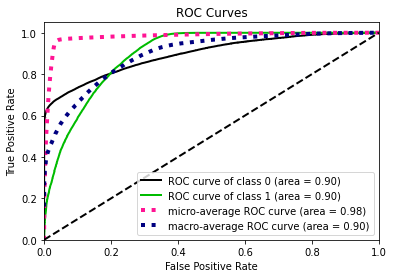

Confusion Matrix

[[ 13320   9976]
 [   283 242635]]


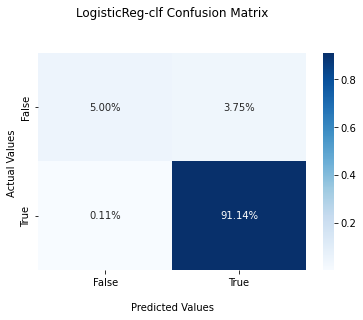

XGBClassifier()
XGBoost Accuracy:  0.9631724852937862
              precision    recall  f1-score   support

 Bad Loan->0       0.97      0.60      0.74     23296
Good Loan->1       0.96      1.00      0.98    242918

    accuracy                           0.96    266214
   macro avg       0.96      0.80      0.86    266214
weighted avg       0.96      0.96      0.96    266214



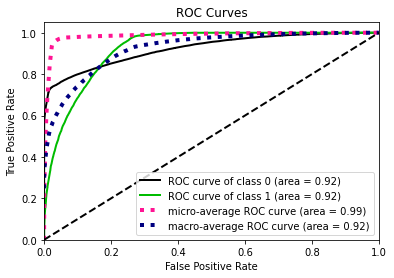

Confusion Matrix

[[ 13982   9314]
 [   490 242428]]


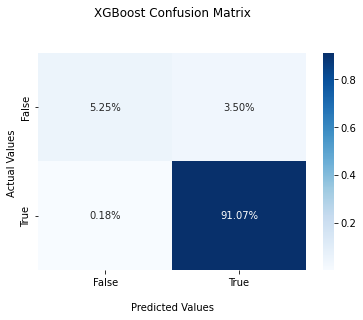

DecisionTreeClassifier()
DecisionTree-clf Accuracy:  0.9454949777246876
              precision    recall  f1-score   support

 Bad Loan->0       0.68      0.71      0.70     23296
Good Loan->1       0.97      0.97      0.97    242918

    accuracy                           0.95    266214
   macro avg       0.83      0.84      0.83    266214
weighted avg       0.95      0.95      0.95    266214



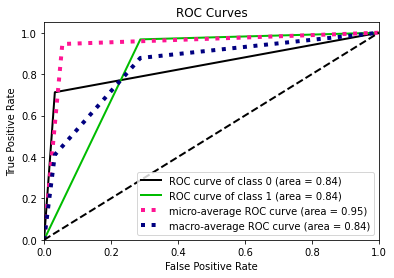

Confusion Matrix

[[ 16598   6698]
 [  7812 235106]]


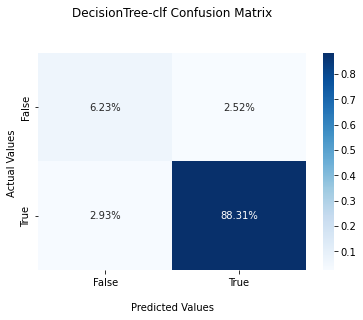

GradientBoostingClassifier()
GradientBoosting-clf Accuracy:  0.9644120895219636
              precision    recall  f1-score   support

 Bad Loan->0       0.94      0.64      0.76     23296
Good Loan->1       0.97      1.00      0.98    242918

    accuracy                           0.96    266214
   macro avg       0.95      0.82      0.87    266214
weighted avg       0.96      0.96      0.96    266214



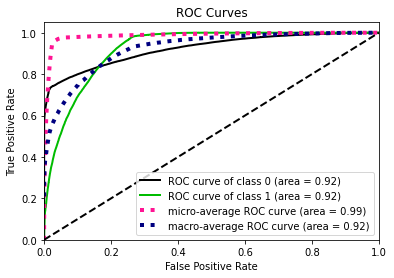

Confusion Matrix

[[ 14802   8494]
 [   980 241938]]


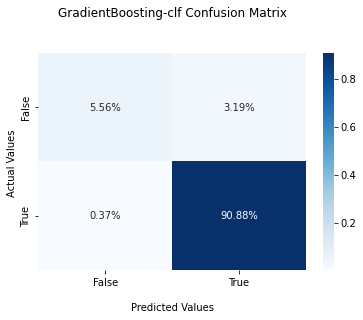

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

target_names = ['Bad Loan->0', 'Good Loan->1']

# Iterate through the dict. of classifiers
for clf in dict_classifiers:
    print(dict_classifiers[clf]) 
    # fit the classifier
    model = dict_classifiers[clf].fit(X_train, y_train)

    y_predict = dict_classifiers[clf].predict(X_test)
    print(clf+' Accuracy: ', accuracy_score(y_test, y_predict))
    
    print(classification_report(y_test, y_predict,target_names=target_names))
    y_score = dict_classifiers[clf].predict_proba(X_test)
         
    #A look at the ROC
    plot_roc(y_test, y_score)
    plt.show()
         
    #Confusion Matrix
    print("Confusion Matrix\n")
    print(confusion_matrix(y_test, y_predict))
    cf_matrix = confusion_matrix(y_test, y_predict)
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

    ax.set_title(clf+ ' Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    plt.show()


In [28]:
#
from collections import Counter
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1: 566584, 0: 54581})
Testing target statistics: Counter({1: 242918, 0: 23296})


In [29]:
%%capture
!pip install -U imbalanced-learn
import imblearn
from imblearn.combine import SMOTEENN

In [30]:
## Keep original training data before SMOTE
X_train0 = X_train.copy()
y_train0 = y_train.copy()

In [31]:
X_train.shape

(621165, 131)

In [32]:
# Used to see if balancing the minority class (bad loan) training would make a difference
# Apply SMOTE to get a rebalanced dataset
#sme = SMOTEENN(random_state=42)
#X_tr_res, y_tr_res = sme.fit_resample(X_train, y_train)
#print(X_train.shape)
#print(y_train.shape)
#unique(y_train, return_counts=True)
